# 1

In [314]:
import numpy as np
import pandas as pd
from ta.volatility import BollingerBands
import finpy_tse as tse
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, LSTM, GRU
import matplotlib.pyplot as plt

In [76]:
# شاخص کل

df1 = tse.Get_CWI_History(ignore_date=True,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

df1

,Date,Weekday,Open,High,Low,Close,Adj Close,Volume
J-Date,,,,,,,,
1387-09-16,2008-12-06,Saturday,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
1387-09-17,2008-12-07,Sunday,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
1387-09-18,2008-12-08,Monday,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
1387-09-20,2008-12-10,Wednesday,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
1387-09-23,2008-12-13,Saturday,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...,...
1402-10-06,2023-12-27,Wednesday,2178990.0,2179310.0,2177410.0,2177410.0,2177410.5,4179593089
1402-10-09,2023-12-30,Saturday,2178610.0,2184180.0,2178610.0,2182718.0,2182717.8,5088271345
1402-10-10,2023-12-31,Sunday,2182820.0,2182820.0,2176090.0,2176102.0,2176102.5,4461490642


In [77]:
# شاخص هم‌وزن

df2 = tse.Get_EWI_History(ignore_date=True,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

df2

,Date,Weekday,Open,High,Low,Close,Adj Close,Volume
J-Date,,,,,,,,
1393-12-04,2015-02-23,Monday,9899.0,9940.0,989911.0,9939.0,9908.0,314729140
1393-12-05,2015-02-24,Tuesday,9911.0,9926.0,9893.0,9893.0,9893.4,278521094
1393-12-06,2015-02-25,Wednesday,9895.0,9895.0,9815.0,9815.0,9815.1,271188153
1393-12-09,2015-02-28,Saturday,9818.0,9823.0,9794.0,9794.0,9794.4,257849083
1393-12-10,2015-03-01,Sunday,9794.0,9812.0,9788.0,9811.0,9811.4,475683577
...,...,...,...,...,...,...,...,...
1402-10-06,2023-12-27,Wednesday,755434.0,755808.0,755235.0,755296.0,755296.0,4179593089
1402-10-09,2023-12-30,Saturday,756266.0,760144.0,756266.0,759645.0,759645.0,5088271345
1402-10-10,2023-12-31,Sunday,759783.0,759894.0,758301.0,758313.0,758313.0,4461490642


In [78]:
# شاخص نماد فولاد

df3 = tse.Get_Price_History(stock='فولاد',
                            ignore_date=True,
                            adjust_price=True,
                            show_weekday=True,
                            double_date=True)

df3

,Date,Weekday,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
J-Date,,,,,,,,,,,,,,,,,,
1385-12-20,2007-03-11,Sunday,1900,1938,1900,1900,1900,468077431,889437216900,7736,فولاد,فولاد مبارکه اصفهان,بورس,9,9,9,9,9
1385-12-21,2007-03-12,Monday,1938,1938,1938,1938,1938,100041000,193879458000,9214,فولاد,فولاد مبارکه اصفهان,بورس,9,9,9,9,9
1385-12-22,2007-03-13,Tuesday,1976,1976,1915,1973,1973,126270939,249241504527,5862,فولاد,فولاد مبارکه اصفهان,بورس,9,9,9,9,9
1385-12-23,2007-03-14,Wednesday,1934,1966,1934,1934,1934,26705128,51666379451,1901,فولاد,فولاد مبارکه اصفهان,بورس,9,9,9,9,9
1385-12-26,2007-03-17,Saturday,1896,1927,1896,1898,1898,14877283,28239006789,1514,فولاد,فولاد مبارکه اصفهان,بورس,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402-10-06,2023-12-27,Wednesday,6270,6270,6190,6220,6220,123557080,768386352510,4970,فولاد,فولاد مبارکه اصفهان,بورس,6270,6270,6190,6220,6220
1402-10-09,2023-12-30,Saturday,6280,6330,6250,6280,6280,65778615,413007029830,3774,فولاد,فولاد مبارکه اصفهان,بورس,6280,6330,6250,6280,6280
1402-10-10,2023-12-31,Sunday,6300,6300,6180,6190,6230,80066614,498910921170,3884,فولاد,فولاد مبارکه اصفهان,بورس,6300,6300,6180,6190,6230


In [79]:
df1_subset = df1[['Date', 'Close']]
df2_subset = df2[['Date', 'Close']]
df3_subset = df3[['Date', 'Close']]

merge_df = pd.merge(df1_subset, df2_subset, on="Date", how="inner", suffixes=('_CWI', '_EWI'))
merge_df = pd.merge(merge_df, df3_subset, on="Date", how="inner")

merge_df

,Date,Close_CWI,Close_EWI,Close
0,2015-02-23,64678.0,9939.0,1910
1,2015-02-24,64526.0,9893.0,1896
2,2015-02-25,64052.0,9815.0,1880
3,2015-02-28,63951.0,9794.0,1844
4,2015-03-01,63860.0,9811.0,1867
...,...,...,...,...
2001,2023-12-27,2177410.0,755296.0,6220
2002,2023-12-30,2182718.0,759645.0,6280
2003,2023-12-31,2176102.0,758313.0,6190
2004,2024-01-01,2168327.0,757994.0,6180


In [334]:
label = []

for i in range(len(merge_df) - 1):
    label.append(1 if merge_df['Close'].iloc[i + 1] > merge_df['Close'].iloc[i] else 0)

merge_df = merge_df.drop(merge_df.index[-1])

merge_df['Label'] = label
merge_df['Label'] = merge_df['Label'].astype(int)

merge_df

,Date,Close_CWI,Close_EWI,Close,Label
0,2015-02-23,64678.0,9939.0,1910,0
1,2015-02-24,64526.0,9893.0,1896,0
2,2015-02-25,64052.0,9815.0,1880,0
3,2015-02-28,63951.0,9794.0,1844,1
4,2015-03-01,63860.0,9811.0,1867,1
...,...,...,...,...,...
1997,2023-12-23,2208343.0,761785.0,6340,0
1998,2023-12-24,2200110.0,761234.0,6280,0
1999,2023-12-25,2194500.0,760623.0,6240,0
2000,2023-12-26,2178752.0,755254.0,6200,1


In [216]:
window_sizes = [10, 20, 30]

def create_windows(data, target_column, feature_column, window_size):
    features = []
    labels = []

    for i in range(len(data) - window_size - 1):
        feature_window = data[feature_column].iloc[i : i + window_size].values
        label = data[target_column].iloc[i + window_size + 1]
        features.append(feature_window)
        labels.append(label)

    return np.array(features), np.array(labels)

In [82]:
target_variable = 'Label'
feature_columns = ['Close_CWI', 'Close_EWI', 'Close']

In [335]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])

train_data = merge_df[merge_df['Date'].dt.year.isin([2015, 2016, 2017])].copy()

val_data = merge_df[merge_df['Date'].dt.year == 2018].copy()

test_data = merge_df[merge_df['Date'].dt.year == 2022].copy()

In [325]:
# scaler = MinMaxScaler()
# train_data.loc[:, feature_columns] = scaler.fit_transform(train_data[feature_columns])
# val_data.loc[:, feature_columns] = scaler.transform(val_data[feature_columns])
# test_data.loc[:, feature_columns] = scaler.transform(test_data[feature_columns])

In [336]:
scaler = StandardScaler()
train_data.loc[:, feature_columns] = scaler.fit_transform(train_data[feature_columns])
val_data.loc[:, feature_columns] = scaler.transform(val_data[feature_columns])
test_data.loc[:, feature_columns] = scaler.transform(test_data[feature_columns])

In [357]:
def plot_loss(history, predictions, model_name, window_size, y_test):
    threshold = 0.5
    predicted_labels = np.where(predictions > threshold, 1, 0)
    if set(np.unique(predicted_labels)) == {0, 1}:
        # predicted_labels = np.sign(predictions)
        print(f'Unique labels : {np.unique(predicted_labels)}')
        accuracy = np.mean(predicted_labels == y_test)
        print(f'{model_name} model with window size {window_size}   Accuracy = {accuracy}')
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        return True
    
    return False

7/7 [==============================] - 1s 3ms/step
Unique labels : [0 1]
LSTM model with window size 10   Accuracy = 0.47213648834019206


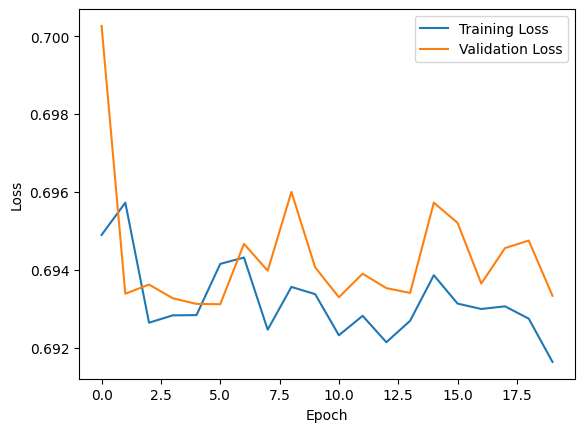

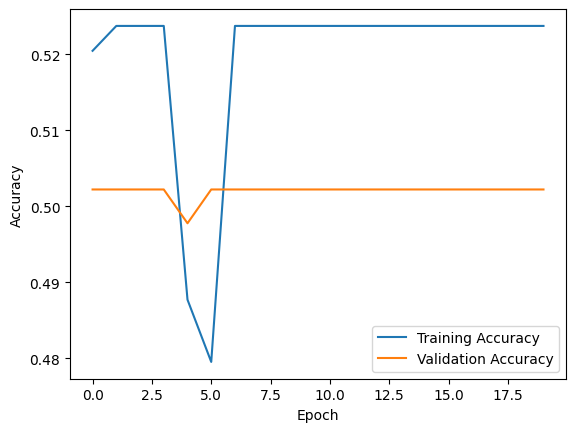

7/7 [==============================] - 0s 2ms/step
Unique labels : [0 1]
GRU model with window size 10   Accuracy = 0.46266289437585734


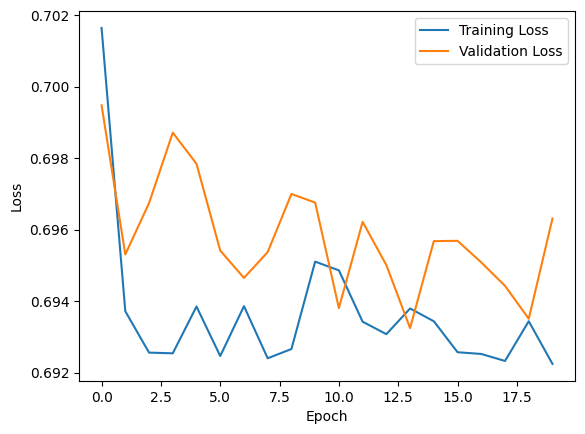

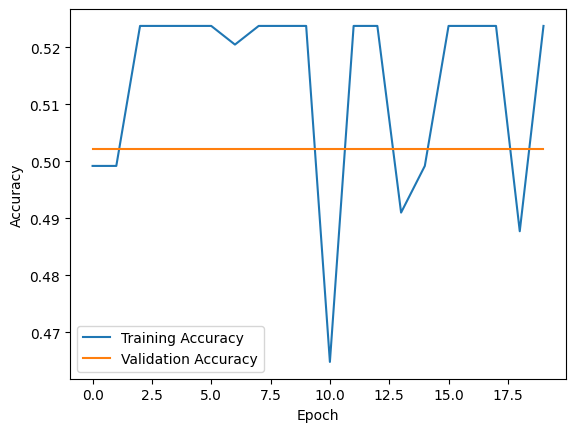

7/7 [==============================] - 0s 1ms/step
Unique labels : [0 1]
CNN model with window size 10   Accuracy = 0.46935013717421126


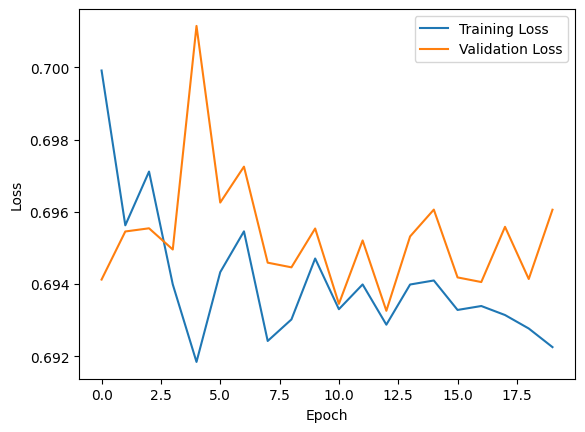

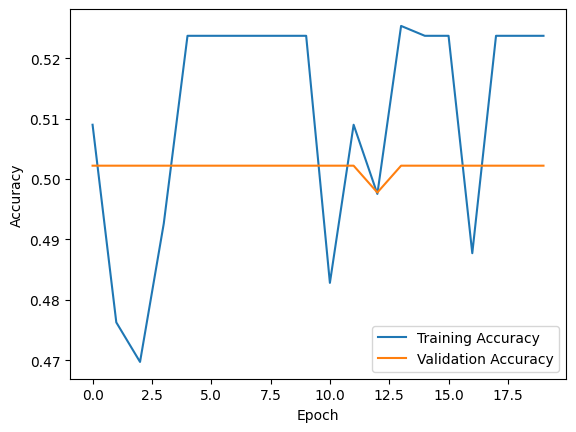

7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
LSTM model with window size 20   Accuracy = 0.5072579885003299


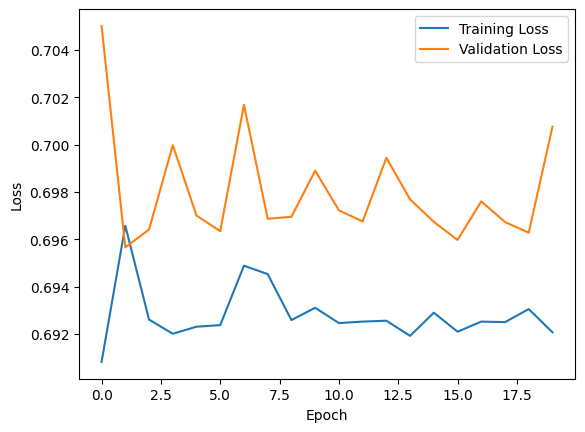

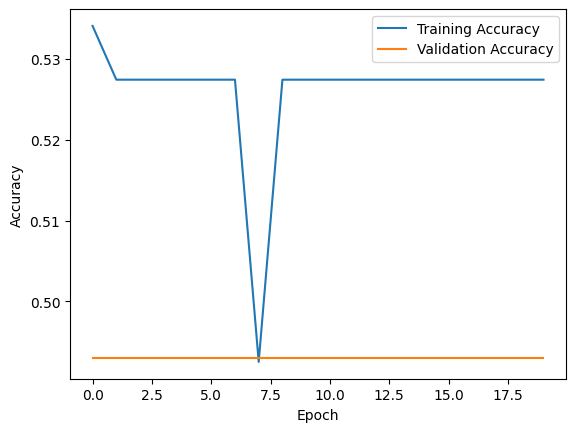

7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 20   Accuracy = 0.4914223772268828


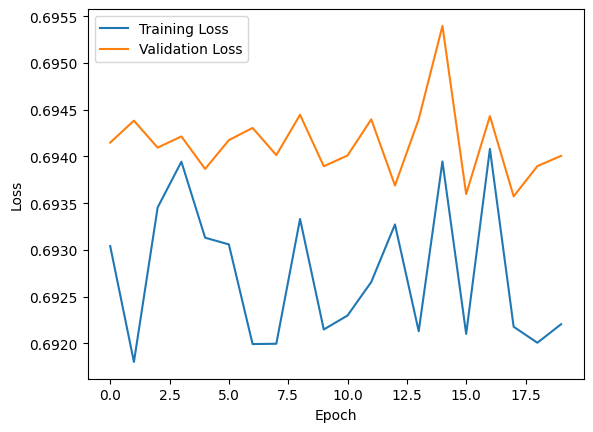

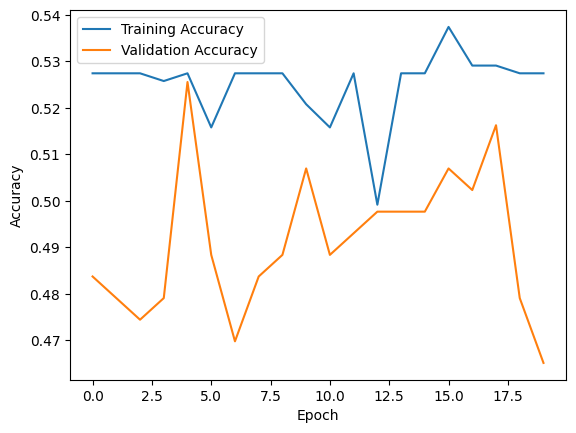

7/7 [==============================] - 0s 1ms/step
Unique labels : [0 1]
CNN model with window size 20   Accuracy = 0.48218493731737205


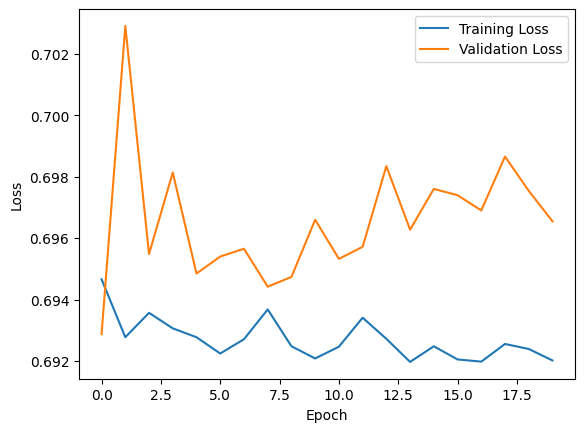

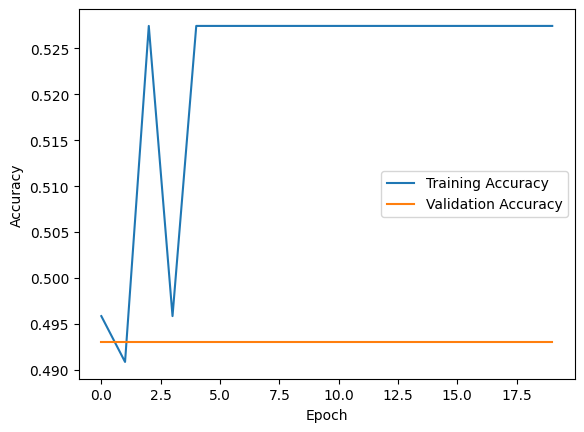

7/7 [==============================] - 0s 4ms/step
Unique labels : [0 1]
LSTM model with window size 30   Accuracy = 0.5081216159933362


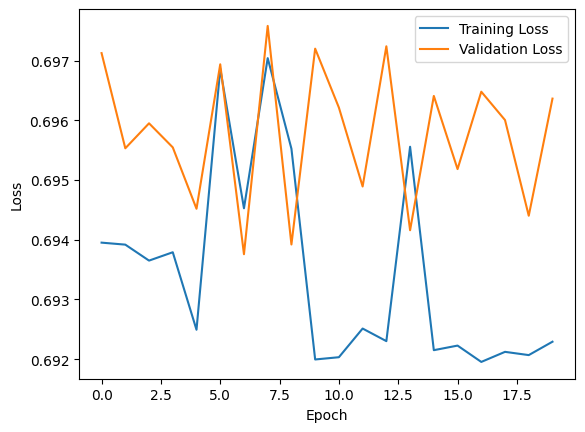

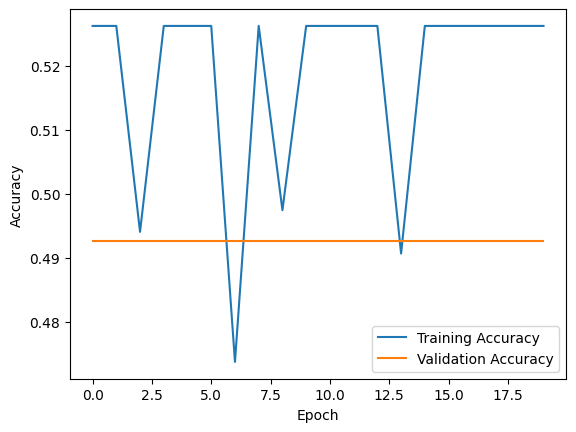

7/7 [==============================] - 0s 7ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5392544773011245


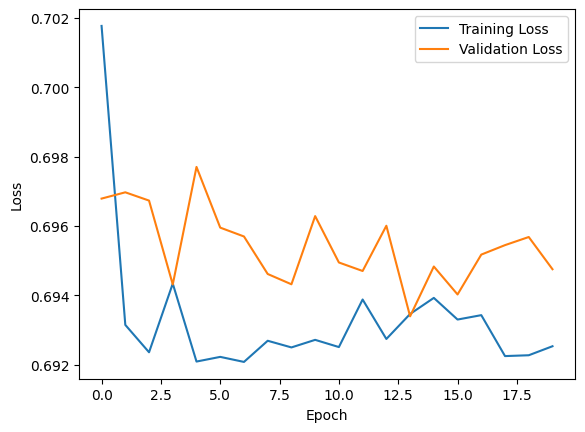

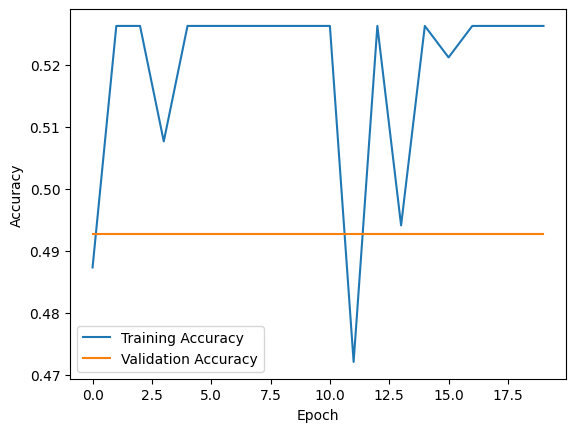

7/7 [==============================] - 0s 1ms/step
Unique labels : [0 1]
CNN model with window size 30   Accuracy = 0.48443356934610576


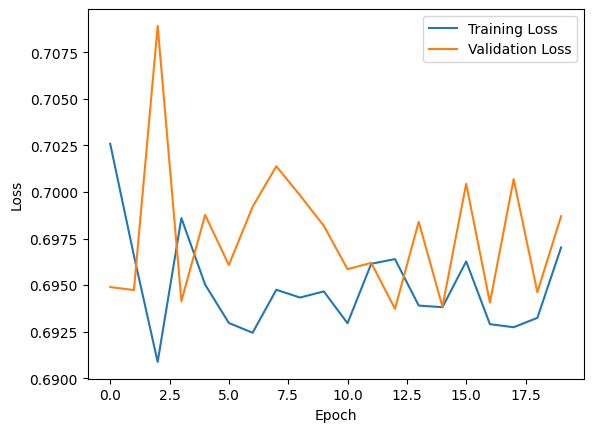

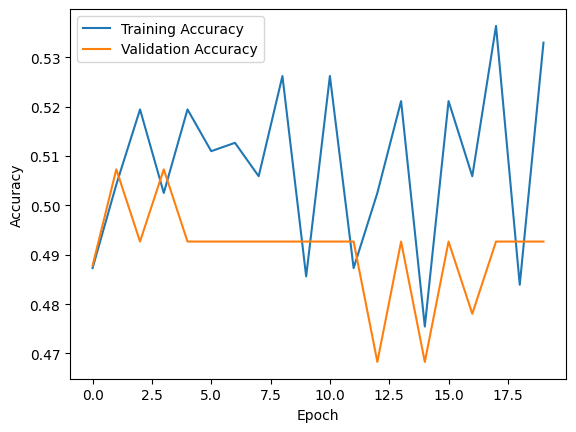

In [364]:
for window_size in window_sizes:        
    X_train, y_train = create_windows(train_data, target_variable, feature_columns, window_size)
    X_val, y_val = create_windows(val_data, target_variable, feature_columns, window_size)
    X_test, y_test = create_windows(test_data, target_variable, feature_columns, window_size)
    X_train = np.reshape(X_train, (X_train.shape[0], window_size, len(feature_columns)))
    X_val = np.reshape(X_val, (X_val.shape[0], window_size, len(feature_columns)))
    X_test = np.reshape(X_test, (X_test.shape[0], window_size, len(feature_columns)))

    while True:
        lstm_model = Sequential([
            LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(1, activation='sigmoid')  # Binary classification
        ])
        lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        predictions = lstm_model.predict(X_test)
        if plot_loss(history, predictions, 'LSTM', window_size, y_test):
            break

    while True:
        gru_model = Sequential([
            GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(1, activation='sigmoid')  # Binary classification
        ])
        gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        predictions = gru_model.predict(X_test)
        if plot_loss(history, predictions, 'GRU', window_size, y_test):
            break

    while True:
        cnn_model = Sequential([
            Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(50, activation='relu'),
            Dense(1, activation='sigmoid')  # Binary classification
        ])
        cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        predictions = cnn_model.predict(X_test)
        if plot_loss(history, predictions, 'CNN', window_size, y_test):
            break

In [365]:
window_size = 30

In [366]:
# Initialize Bollinger Bands Indicator
indicator_CWI = BollingerBands(close=merge_df["Close_CWI"], window=window_size, window_dev=2)
indicator_EWI = BollingerBands(close=merge_df["Close_EWI"], window=window_size, window_dev=2)
indicator = BollingerBands(close=merge_df["Close"], window=window_size, window_dev=2)

merge_df['CWI_mavg'] = indicator_CWI.bollinger_mavg()
merge_df['EWI_mavg'] = indicator_EWI.bollinger_mavg()
merge_df['_mavg'] = indicator.bollinger_mavg()

merge_df = merge_df.dropna()
merge_df

,Date,Close_CWI,Close_EWI,Close,Label,CWI_mavg,EWI_mavg,_mavg
29,2015-04-13,68454.0,10186.0,2048,1,6.556477e+04,10005.166667,1982.433333
30,2015-04-14,68465.0,10227.0,2050,1,6.569100e+04,10014.766667,1987.100000
31,2015-04-15,68079.0,10228.0,2073,1,6.580943e+04,10025.933333,1993.000000
32,2015-04-18,67374.0,10206.0,2130,0,6.592017e+04,10038.966667,2001.333333
33,2015-04-19,67379.0,10218.0,2130,0,6.603443e+04,10053.100000,2010.866667
...,...,...,...,...,...,...,...,...
1997,2023-12-23,2208343.0,761785.0,6340,0,2.102086e+06,727753.300000,5778.666667
1998,2023-12-24,2200110.0,761234.0,6280,0,2.106940e+06,729824.700000,5800.000000
1999,2023-12-25,2194500.0,760623.0,6240,0,2.111636e+06,731811.500000,5821.333333
2000,2023-12-26,2178752.0,755254.0,6200,1,2.115729e+06,733465.666667,5842.000000


In [367]:
target_variable = 'Label'
feature_columns = ['Close_CWI', 'Close_EWI', 'Close']
new_features = ['CWI_mavg', 'EWI_mavg', '_mavg']

In [ ]:
merge_df.loc['Date'] = pd.to_datetime(merge_df['Date'])

train_data = merge_df[merge_df['Date'].dt.year.isin([2015, 2016, 2017])].copy()

val_data = merge_df[merge_df['Date'].dt.year == 2018].copy()

test_data = merge_df[merge_df['Date'].dt.year == 2022].copy()

scaler = StandardScaler()
train_data.loc[:, feature_columns + new_features] = scaler.fit_transform(train_data[feature_columns + new_features])
val_data.loc[:, feature_columns + new_features] = scaler.transform(val_data[feature_columns + new_features])
test_data.loc[:, feature_columns + new_features] = scaler.transform(test_data[feature_columns + new_features])

In [372]:
def generate_subsets(input_list):
    n = len(input_list)
    all_subsets = []

    for i in range(2**n):
        subset = [input_list[j] for j in range(n) if (i >> j) & 1]
        if subset:  # Check if the subset is not empty
            all_subsets.append(subset)

    return all_subsets

features = generate_subsets(new_features)

New featue : '['CWI_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5480528946272386


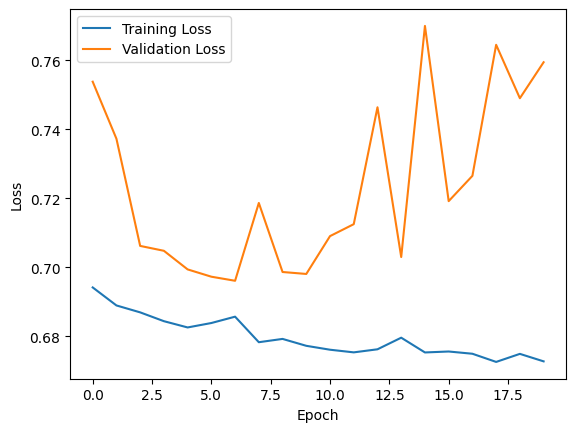

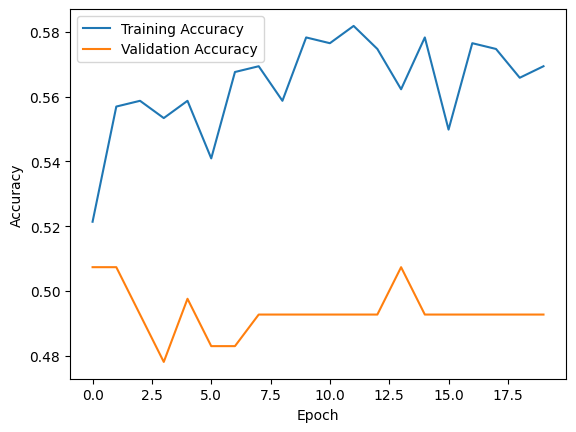

New featue : '['EWI_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.4783423573511037


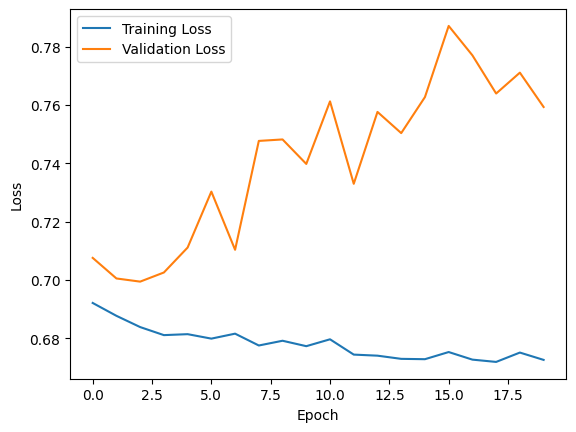

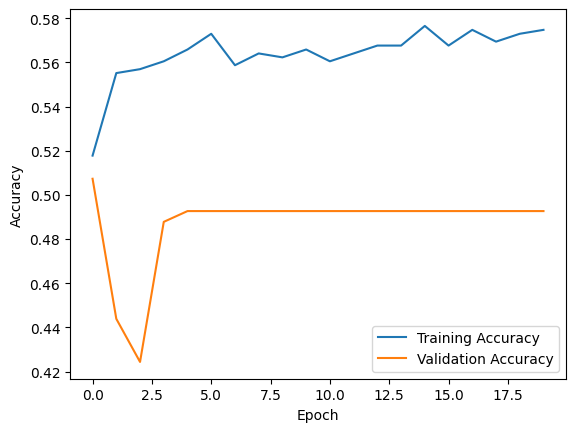

New featue : '['CWI_mavg', 'EWI_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5507600999583507


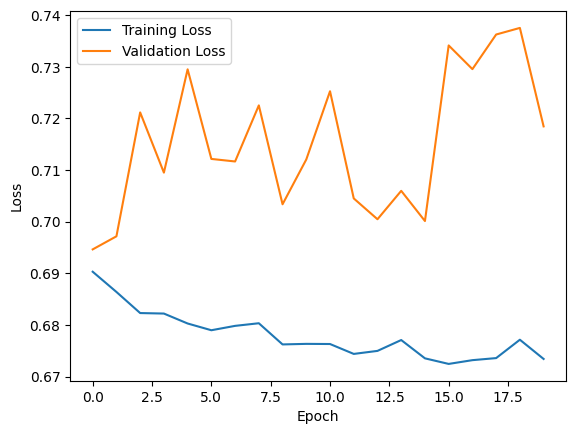

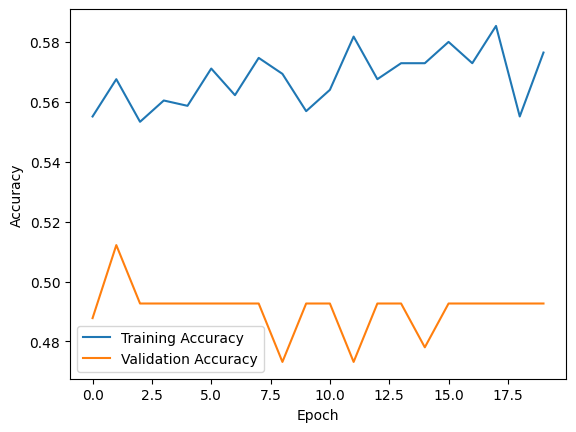

New featue : '['_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5433152852977926


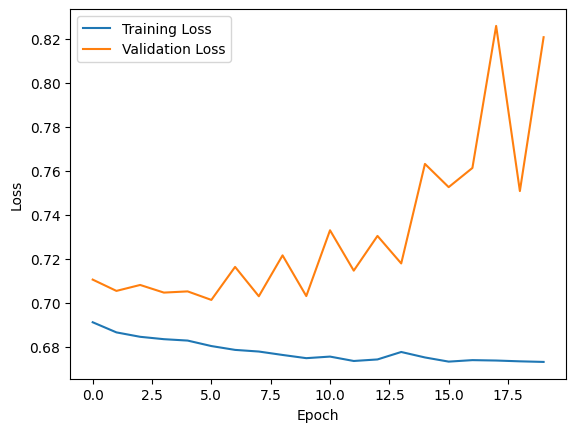

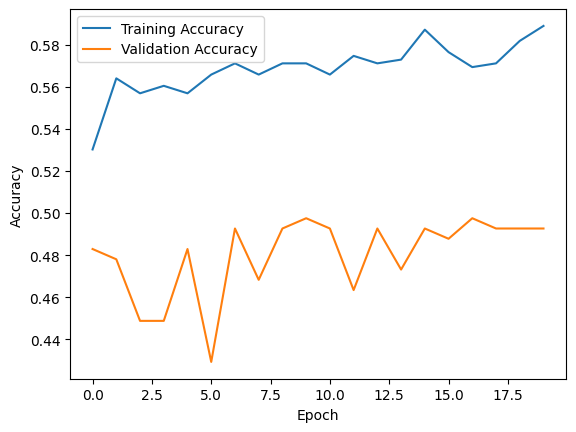

New featue : '['CWI_mavg', '_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5257184506455643


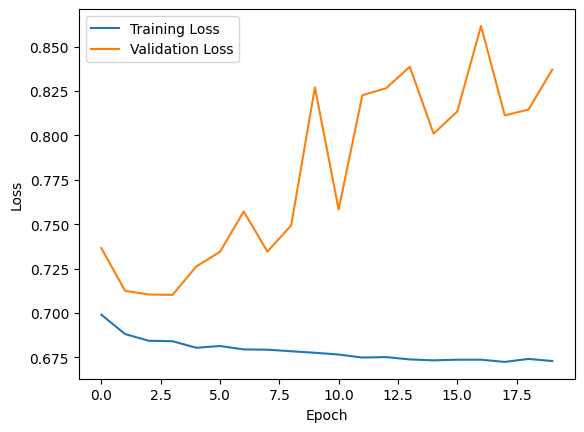

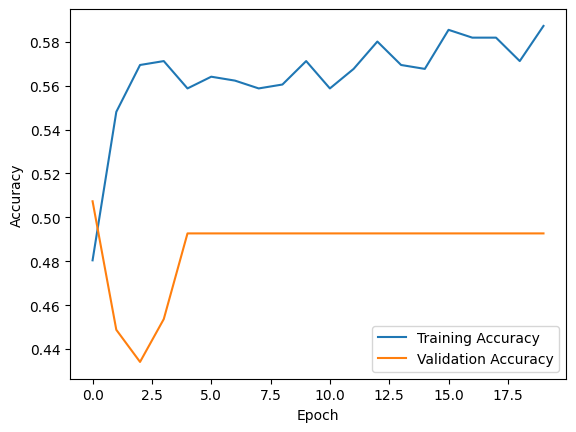

New featue : '['EWI_mavg', '_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5297792586422324


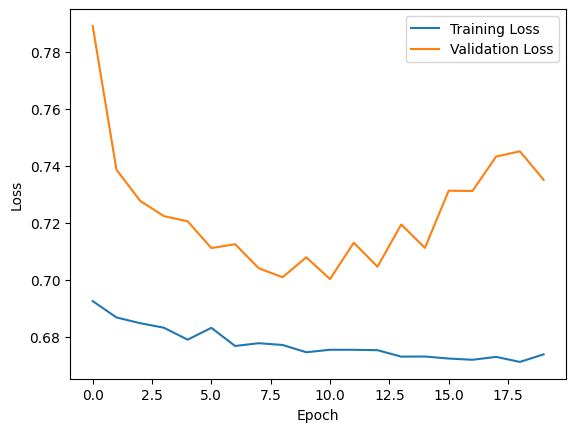

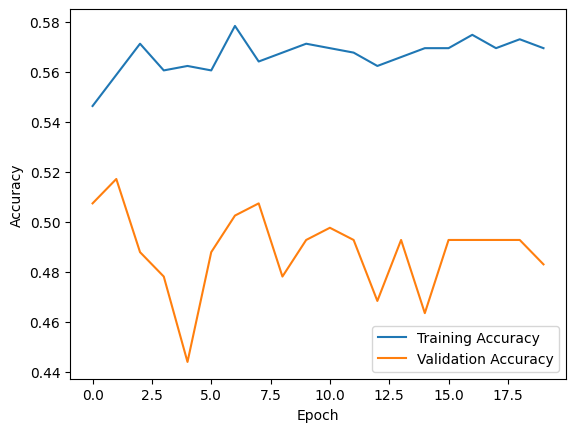

New featue : '['CWI_mavg', 'EWI_mavg', '_mavg']' added
7/7 [==============================] - 0s 3ms/step
Unique labels : [0 1]
GRU model with window size 30   Accuracy = 0.5236880466472303


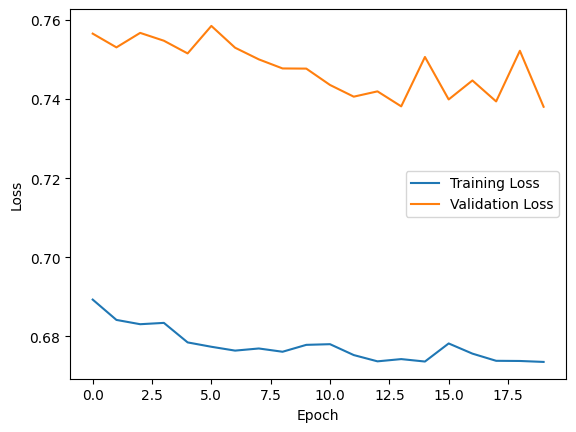

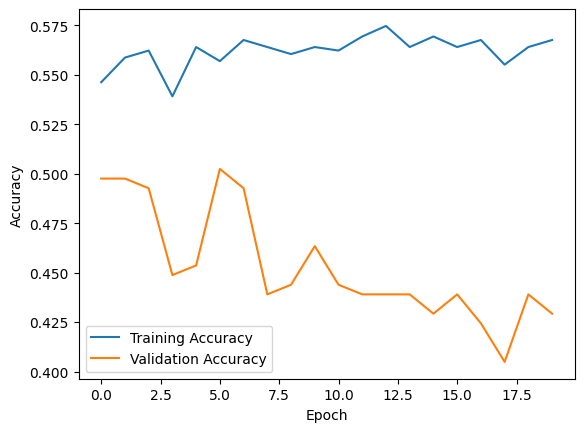

In [380]:
for f in features:
    print(f'New featue : \'{f}\' added')
    X_train, y_train = create_windows(train_data, target_variable, feature_columns + f, window_size)
    X_val, y_val = create_windows(val_data, target_variable, feature_columns + f, window_size)
    X_test, y_test = create_windows(test_data, target_variable, feature_columns + f, window_size)
    X_train = np.reshape(X_train, (X_train.shape[0], window_size, len(feature_columns + f)))
    X_val = np.reshape(X_val, (X_val.shape[0], window_size, len(feature_columns + f)))
    X_test = np.reshape(X_test, (X_test.shape[0], window_size, len(feature_columns + f)))

    while True:
        gru_model = Sequential([
            GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(1, activation='sigmoid')  # Binary classification
        ])
        gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        predictions = gru_model.predict(X_test)
        if plot_loss(history, predictions, 'GRU', window_size, y_test):
            break

# 2

In [245]:
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [246]:
dollar_df = pd.read_csv('./USD.csv')
dollar_df

,gregorian calendar dates,persian calander dates,first price recorded on the day,lowest price recorded on the day,highest price recorded during the day,last price recorded on the day
0,2011/11/27,1390/09/06,13700,13700,13700,13700
1,2011/11/28,1390/09/07,13440,13440,13440,13440
2,2011/11/29,1390/09/08,13350,13350,13350,13350
3,2011/11/30,1390/09/09,13400,13400,13400,13400
4,2011/12/01,1390/09/10,13500,13500,13500,13500
...,...,...,...,...,...,...
2529,2020/06/11,1399/03/22,177500,177500,177610,177500
2530,2020/06/13,1399/03/24,177550,177500,177610,177560
2531,2020/06/14,1399/03/25,177600,177500,177610,177600
2532,2020/06/15,1399/03/26,177530,177500,178910,178800


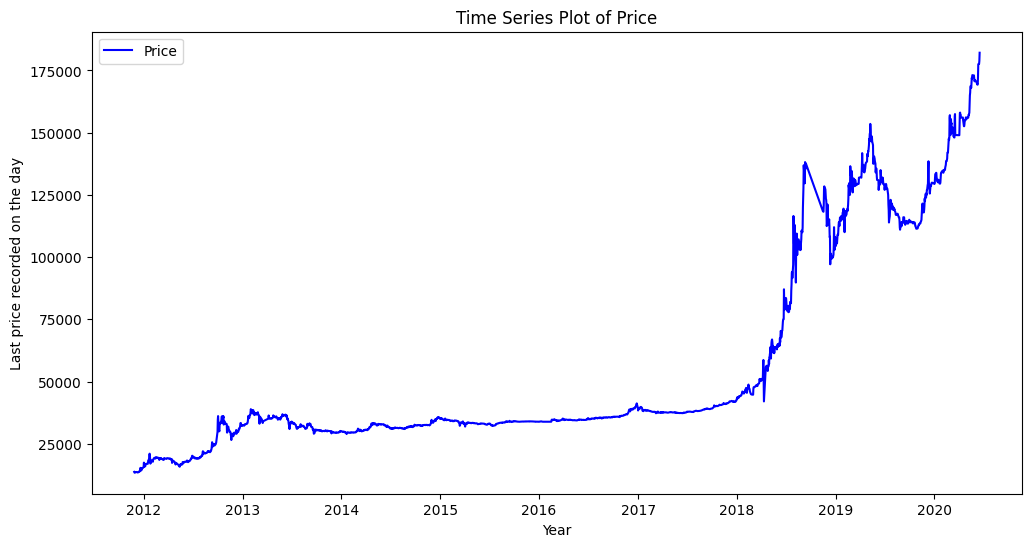

In [247]:
dollar_df['gregorian calendar dates'] = pd.to_datetime(dollar_df['gregorian calendar dates'])

plt.figure(figsize=(12, 6))
plt.plot(dollar_df['gregorian calendar dates'], dollar_df['last price recorded on the day'], label='Price', color='blue')
plt.title('Time Series Plot of Price')
plt.xlabel('Year')
plt.ylabel('Last price recorded on the day')
plt.legend()
plt.show()

In [248]:
new_df = dollar_df[['gregorian calendar dates', 'last price recorded on the day']].copy()
new_df = new_df.rename(columns={'gregorian calendar dates': 'date', 'last price recorded on the day': 'price'})
new_df

,date,price
0,2011-11-27,13700
1,2011-11-28,13440
2,2011-11-29,13350
3,2011-11-30,13400
4,2011-12-01,13500
...,...,...
2529,2020-06-11,177500
2530,2020-06-13,177560
2531,2020-06-14,177600
2532,2020-06-15,178800


In [249]:
train_size = int(len(new_df) * 0.95)
test_size = len(new_df) - train_size
train, test = new_df.iloc[0:train_size].copy(), new_df.iloc[train_size:len(new_df)].copy()
print(train.shape, test.shape)

(2407, 2) (127, 2)


In [250]:
scaler = StandardScaler()
scaler = scaler.fit(train[['price']])
train['price'] = scaler.transform(train[['price']])
test['price'] = scaler.transform(test[['price']])

In [251]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [252]:
TIME_STEPS = 30

X_train, y_train = create_dataset(
  train[['price']],
  train.price,
  TIME_STEPS
)
X_test, y_test = create_dataset(
  test[['price']],
  test.price,
  TIME_STEPS
)

print(X_train.shape)

(2377, 30, 1)


In [253]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(
  keras.layers.TimeDistributed(
    keras.layers.Dense(units=X_train.shape[2])
  )
)
model.compile(loss='mae', optimizer='adam')

In [254]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
67/67 [==============================] - 5s 31ms/step - loss: 0.1841 - val_loss: 0.6093
Epoch 2/10
67/67 [==============================] - 1s 22ms/step - loss: 0.2340 - val_loss: 1.3635
Epoch 3/10
67/67 [==============================] - 1s 22ms/step - loss: 0.2090 - val_loss: 0.6332
Epoch 4/10
67/67 [==============================] - 1s 21ms/step - loss: 0.1845 - val_loss: 0.8439
Epoch 5/10
67/67 [==============================] - 1s 22ms/step - loss: 0.1800 - val_loss: 0.9427
Epoch 6/10
67/67 [==============================] - 1s 22ms/step - loss: 0.1335 - val_loss: 0.5082
Epoch 7/10
67/67 [==============================] - 1s 22ms/step - loss: 0.1482 - val_loss: 0.6688
Epoch 8/10
67/67 [==============================] - 2s 34ms/step - loss: 0.1199 - val_loss: 0.3556
Epoch 9/10
67/67 [==============================] - 1s 21ms/step - loss: 0.1323 - val_loss: 0.6531
Epoch 10/10
67/67 [==============================] - 1s 20ms/step - loss: 0.1181 - val_loss: 0.3073


In [255]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

75/75 [==============================] - 1s 6ms/step


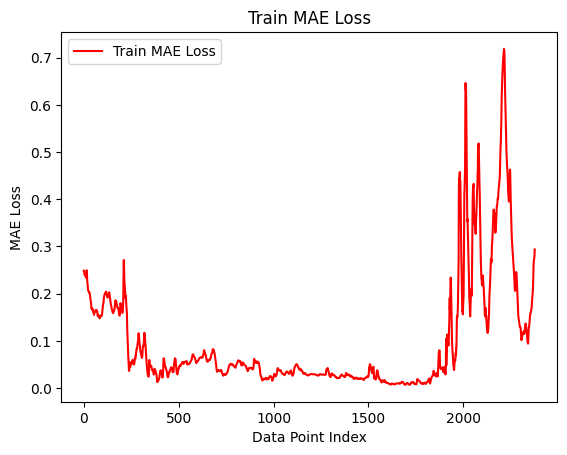

In [256]:
plt.plot(train_mae_loss, label='Train MAE Loss', color='red')

plt.title('Train MAE Loss')
plt.xlabel('Data Point Index')
plt.ylabel('MAE Loss')

plt.legend()
plt.show()

In [302]:
# THRESHOLD = 0.5
THRESHOLD = np.percentile(train_mae_loss, 95)
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

4/4 [==============================] - 0s 6ms/step


In [303]:
test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['date'] = test[TIME_STEPS:].date
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['price'] = test[TIME_STEPS:].price
test_score_df['originPrice'] = new_df.iloc[train_size:len(new_df)].copy()[TIME_STEPS:].price

test_score_df

,date,loss,threshold,anomaly,price,originPrice
2437,2020-02-03,0.370698,0.388195,False,2.608197,133890
2438,2020-02-04,0.374489,0.388195,False,2.620643,134300
2439,2020-02-05,0.378027,0.388195,False,2.626714,134500
2440,2020-02-06,0.381693,0.388195,False,2.643712,135060
2441,2020-02-08,0.384622,0.388195,False,2.644319,135080
...,...,...,...,...,...,...
2529,2020-06-11,1.103950,0.388195,True,3.931969,177500
2530,2020-06-13,1.113340,0.388195,True,3.933790,177560
2531,2020-06-14,1.124699,0.388195,True,3.935005,177600
2532,2020-06-15,1.138374,0.388195,True,3.971430,178800


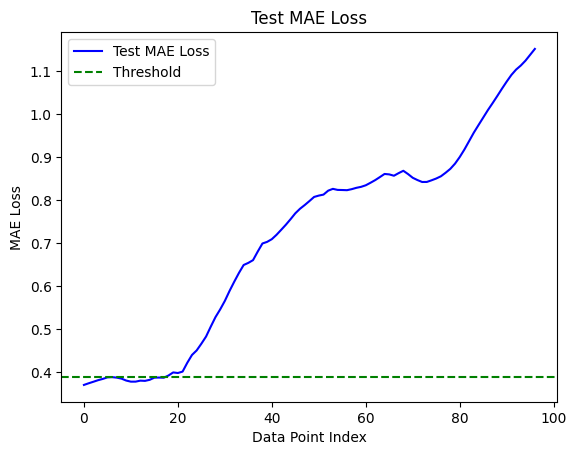

In [304]:
plt.plot(test_mae_loss, label='Test MAE Loss', color='blue')
plt.axhline(y=THRESHOLD, color='green', linestyle='--', label='Threshold')

plt.title('Test MAE Loss')
plt.xlabel('Data Point Index')
plt.ylabel('MAE Loss')

plt.legend()
plt.show()

In [305]:
anomalies = test_score_df[test_score_df.anomaly == True]

anomalies

,date,loss,threshold,anomaly,price,originPrice
2442,2020-02-09,0.388283,0.388195,True,2.642802,135030
2443,2020-02-10,0.388787,0.388195,True,2.673460,136040
2455,2020-02-25,0.392595,0.388195,True,3.036807,148010
2456,2020-02-26,0.399761,0.388195,True,3.276609,155910
2457,2020-02-27,0.398396,0.388195,True,3.310000,157010
...,...,...,...,...,...,...
2529,2020-06-11,1.103950,0.388195,True,3.931969,177500
2530,2020-06-13,1.113340,0.388195,True,3.933790,177560
2531,2020-06-14,1.124699,0.388195,True,3.935005,177600
2532,2020-06-15,1.138374,0.388195,True,3.971430,178800


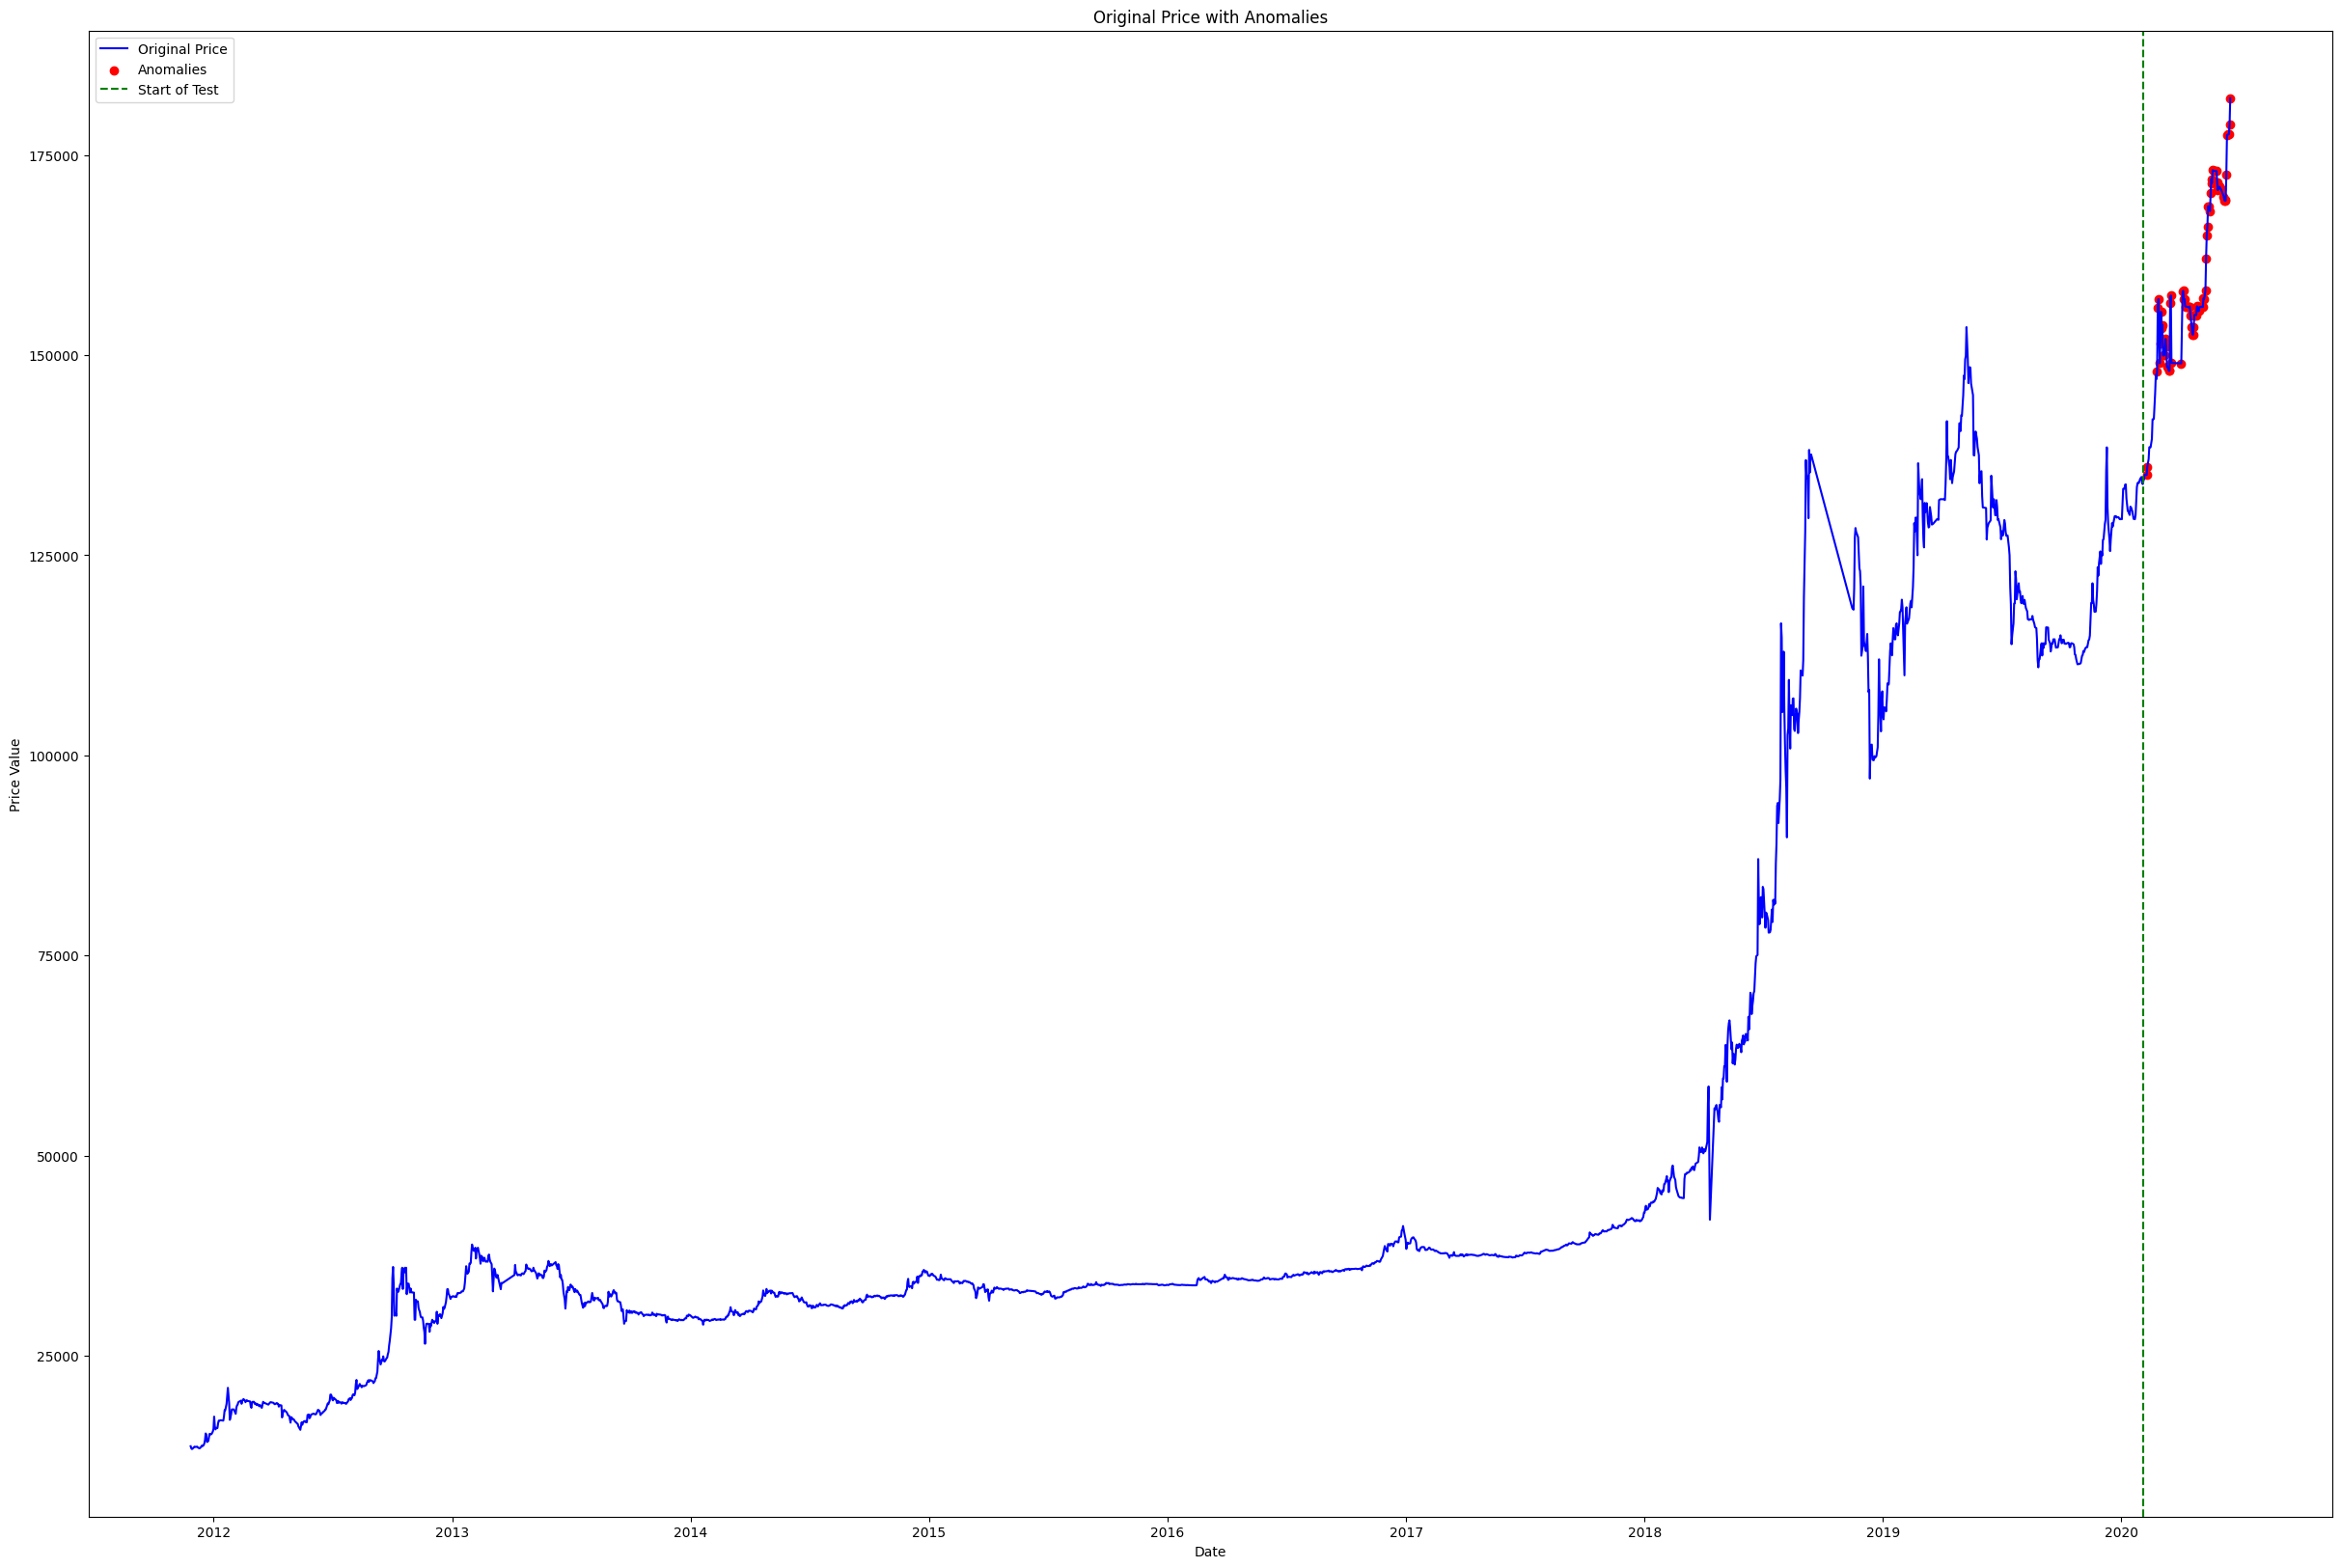

In [384]:
new_df['date'] = pd.to_datetime(new_df['date'])
test_score_df.loc['date'] = pd.to_datetime(test_score_df['date']).copy()

anomaly = anomalies[anomalies['anomaly'] == True]

anomaly_close_values = anomaly['price']

plt.figure(figsize=(30, 20))
plt.plot(new_df['date'], new_df['price'], label='Original Price', color='blue')
plt.scatter(anomaly['date'], anomaly['originPrice'], color='red', label='Anomalies')
plt.axvline(x=test_score_df['date'].iloc[0], color='green', linestyle='--', label='Start of Test')

plt.title('Original Price with Anomalies')
plt.xlabel('Date')
plt.ylabel('Price Value')

plt.legend()
plt.show()
